In [146]:
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path("D:/Machine leraningTraining/End-to-End Machine Learning Project") / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [147]:
import pandas as pd
import os
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data_(housing_path='D:/Machine leraningTraining/End-to-End Machine Learning Project'):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
def load_housing_data():
    tarball_path = Path("D:/Machine leraningTraining/End-to-End Machine Learning Project/datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("D:/Machine leraningTraining/End-to-End Machine Learning Project/datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="D:/Machine leraningTraining/End-to-End Machine Learning Project/datasets")
    return pd.read_csv(Path("D:/Machine leraningTraining/End-to-End Machine Learning Project/datasets/housing/housing.csv"))
housing = load_housing_data()

In [148]:
print(housing.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [149]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [150]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [151]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


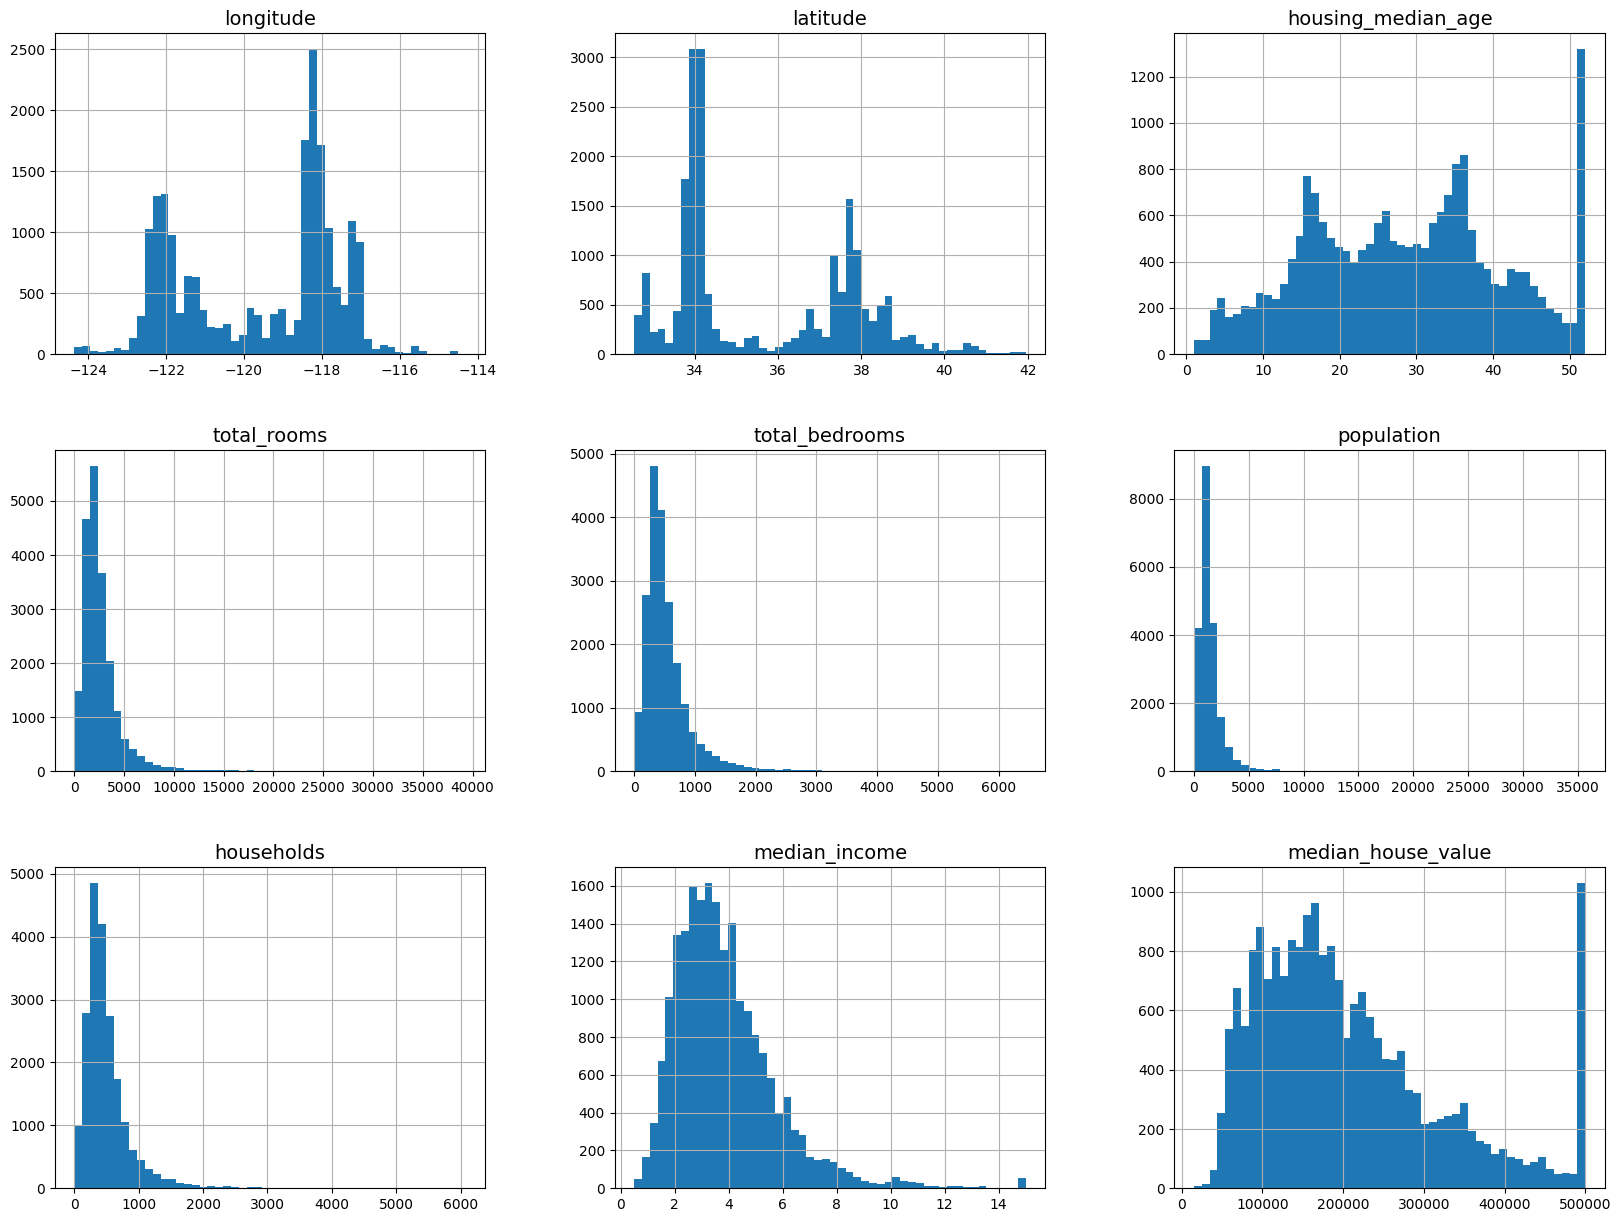

In [152]:
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
housing.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots", tight_layout=True, fig_extension="png", resolution=300)
#save_fig("Copilot_histogram_plots", tight_layout=False, fig_extension="png", resolution=300)
plt.show()

In [153]:
import numpy as np

def split_train_test(data, test_ratio):
    print(f'length data = {len(data)}')
    shuffled_indices = np.random.permutation(len(data))
    print(f'shuffled_indices = {shuffled_indices}')
    test_set_size = int(len(data) * test_ratio)
    print(f'test_set_size = {test_set_size}')
    test_indices = shuffled_indices[:test_set_size]
    print(f'test_indices = {test_indices}')
    train_indices = shuffled_indices[test_set_size:]  
    print(f'train_indices = {train_indices}')
    return data.iloc[train_indices], data.iloc[test_indices]

In [154]:
train_set, test_set = split_train_test(housing, 0.2)

length data = 20640
shuffled_indices = [12750 10437   906 ...  6372  7138 20332]
test_set_size = 4128
test_indices = [12750 10437   906 ... 13244  3269  8939]
train_indices = [ 7160  2219  2937 ...  6372  7138 20332]


In [155]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

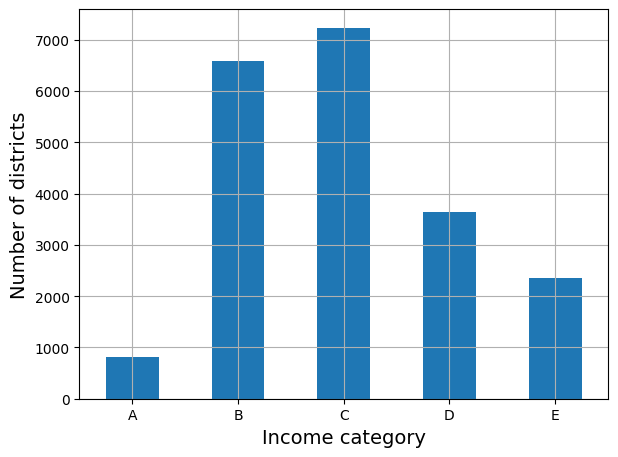

In [156]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=["A", "B", "C", "D", "E"])
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("Income")
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

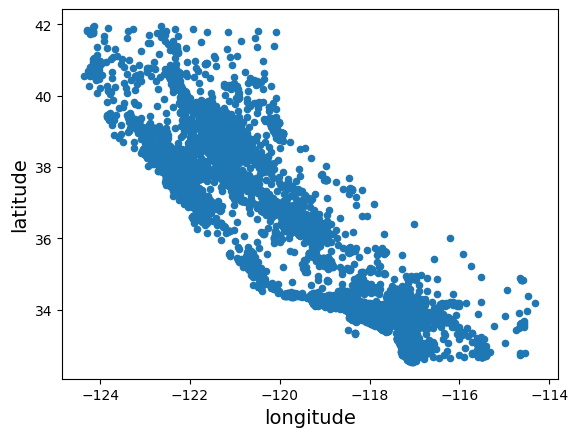

In [157]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

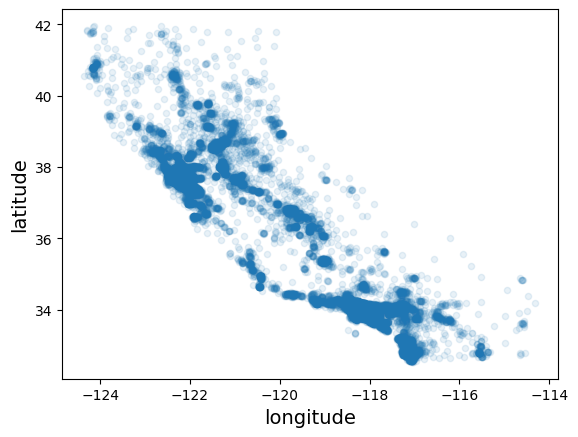

In [158]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

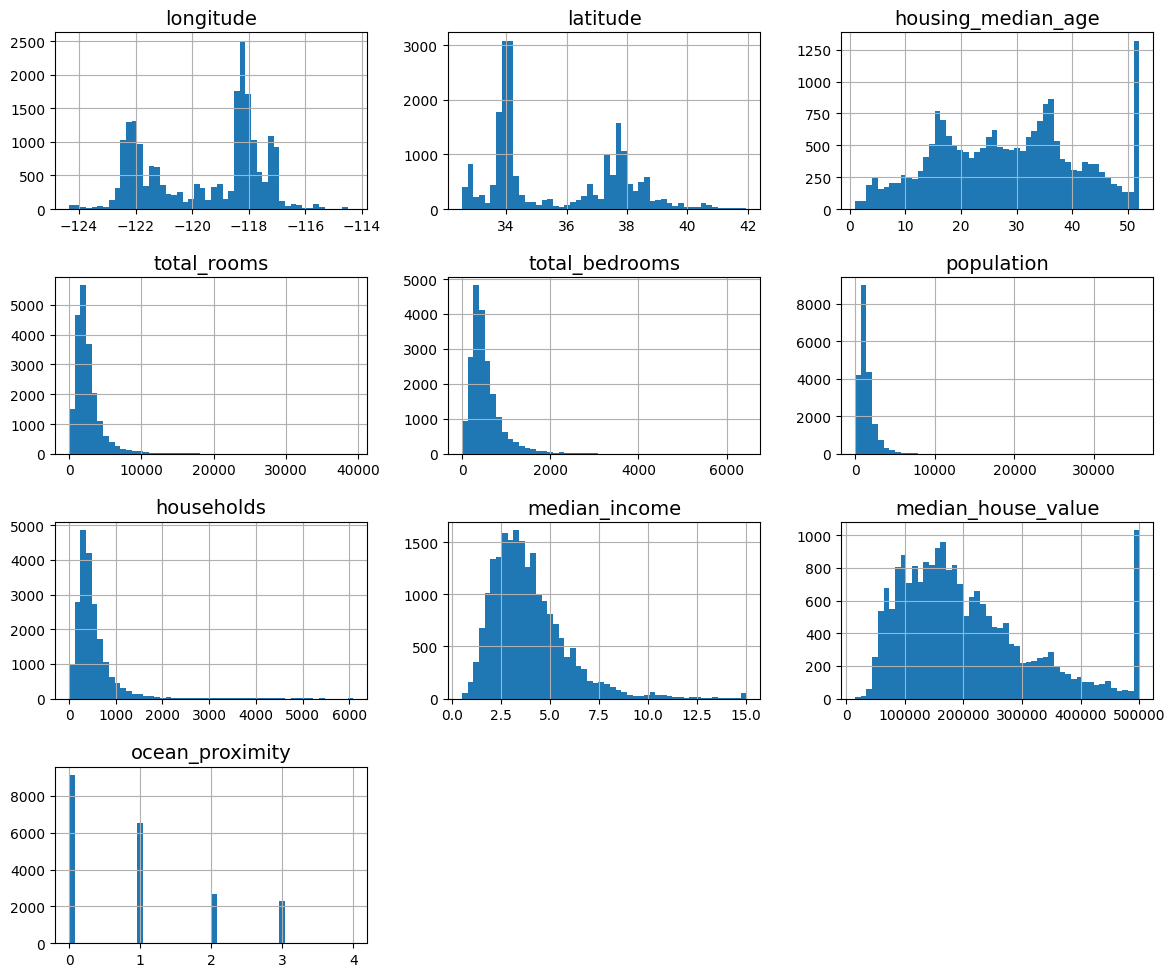

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
housing_copy = housing.copy()
mapping = {
    "<1H OCEAN": 0,
    "INLAND": 1,
    "NEAR OCEAN": 2,
    "NEAR BAY": 3,
    "ISLAND": 4
}

# Apply the mapping
housing_copy['ocean_proximity'] = housing_copy['ocean_proximity'].map(mapping)
housing_copy.hist(figsize=(12, 10), bins=50)  # Adjust bins as needed
save_fig("Ocean_proximity")
plt.show()

In [160]:
import pandas as pd

data=pd.DataFrame({'values': [5,10,15,20,25,30]})
bins = [0,10,20,30]

labels = ['Low', 'Medium', 'High']
data['binned'] = pd.cut(data['values'] , bins=bins)
data['binned_labeled'] = pd.cut(data['values'] , bins=bins,labels=labels)
print(data)
                        

   values    binned binned_labeled
0       5   (0, 10]            Low
1      10   (0, 10]            Low
2      15  (10, 20]         Medium
3      20  (10, 20]         Medium
4      25  (20, 30]           High
5      30  (20, 30]           High


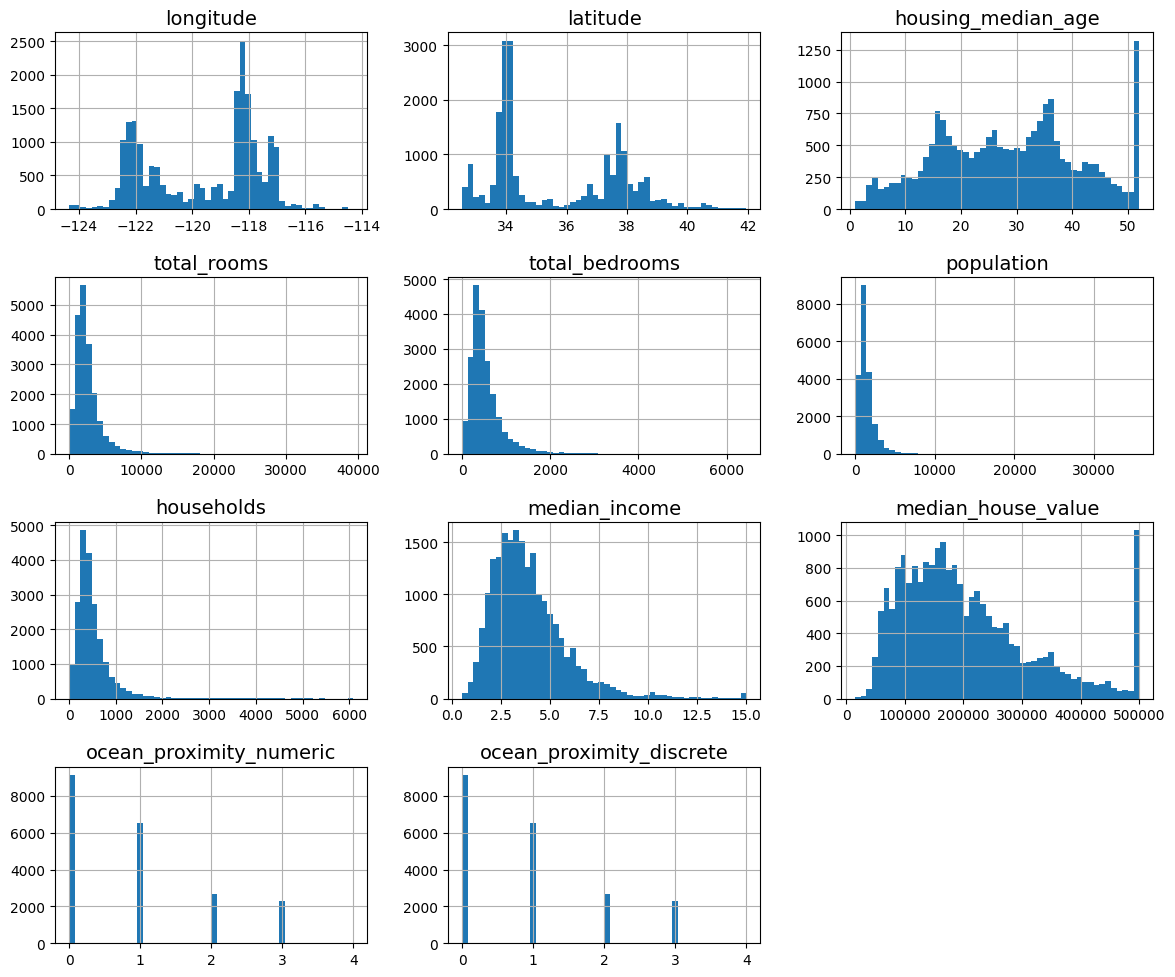

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
housing_copy = housing.copy()

housing_copy['ocean_proximity_numeric'] = housing_copy['ocean_proximity'].map({
    
    "<1H OCEAN": 0,
    "INLAND": 1,
    "NEAR OCEAN": 2,
    "NEAR BAY": 3,
    "ISLAND": 4
})

bins = [-1,0.5,1.5,2.5,3.5,4.5]
labels = [0,1,2,3,4]

housing_copy["ocean_proximity_discrete"] = pd.cut(housing_copy["ocean_proximity_numeric"], bins=bins, labels=labels)
housing_copy["ocean_proximity_discrete"] = housing_copy["ocean_proximity_discrete"].astype(int)

housing_copy.hist(figsize=(12,10),bins=50)
save_fig("Ocean")
plt.show()


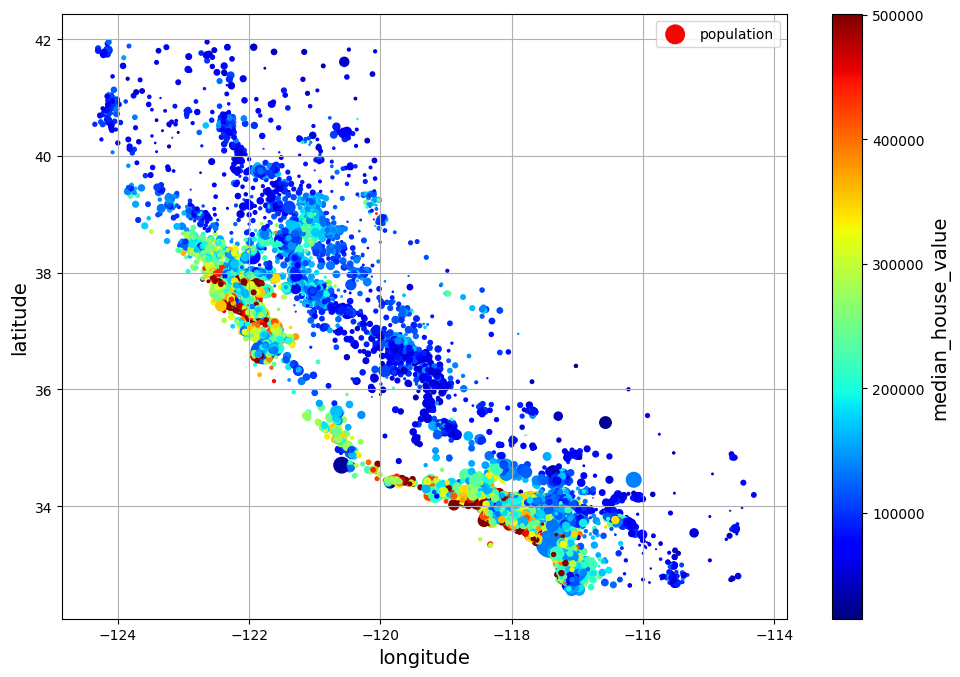

In [162]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("housing_prices_scatterplot")  # extra code
plt.show()

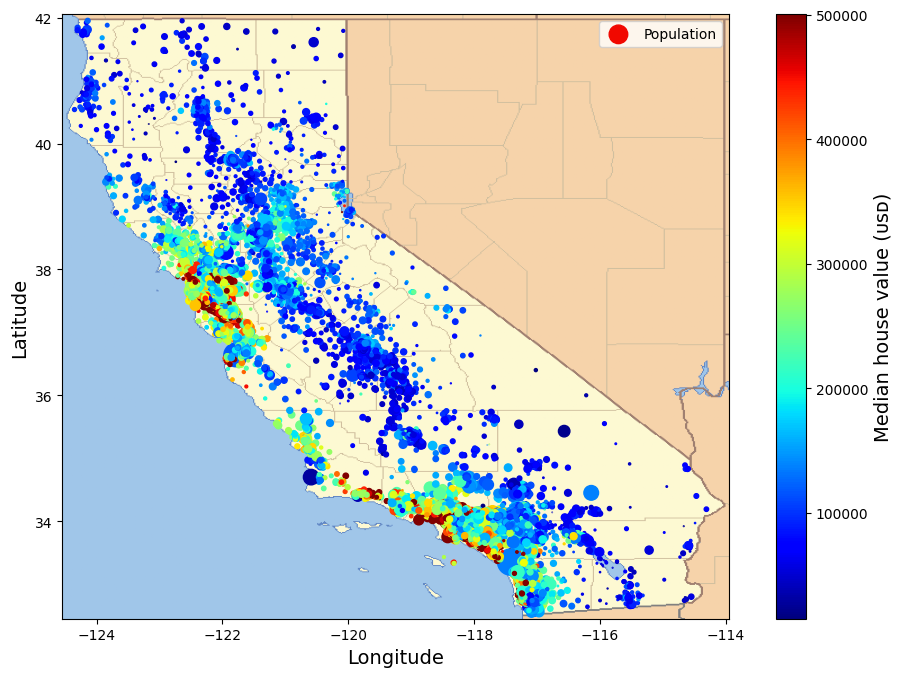

In [163]:
# Download the California image
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()

In [164]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)
#print(corr_matrix)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

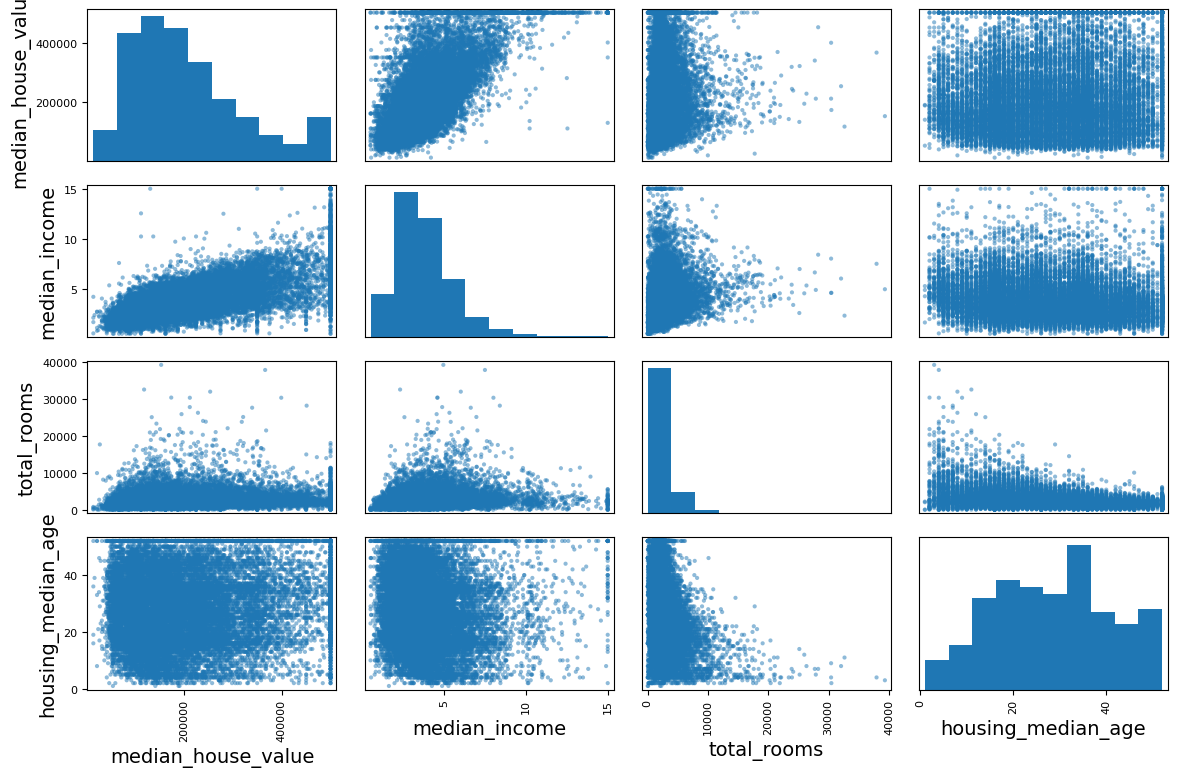

In [165]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

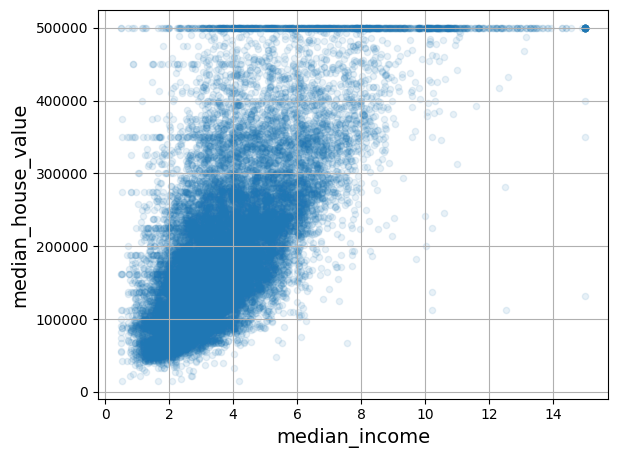

In [166]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
save_fig("income_vs_house_value_scatterplot")  # extra code
plt.show()

In [167]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
i = 0 
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    #print(len(train_index))
    print(strat_train_set_n)
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])
    i += 1 
print(i)
    

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19887    -121.83     37.99                23.0       1150.0           174.0   
9051     -118.20     34.11                37.0       2040.0           611.0   
2502     -122.43     37.76                52.0       2356.0           501.0   
19903    -116.42     33.76                14.0      16921.0          2837.0   
6129     -121.33     38.65                23.0       2446.0           523.0   
...          ...       ...                 ...          ...             ...   
18967    -117.01     32.70                25.0       2321.0           398.0   
11493    -119.70     36.80                31.0       1746.0           321.0   
4591     -118.08     33.83                30.0       2188.0           556.0   
3656     -118.04     34.05                32.0       1252.0           273.0   
9393     -121.28     38.60                17.0       1671.0           378.0   

       population  households  median_income  media

In [168]:
print(type(splitter))

<class 'sklearn.model_selection._split.StratifiedShuffleSplit'>


In [169]:
print(splitter.split(housing, housing['income_cat']))

<generator object BaseShuffleSplit.split at 0x000002A76562C840>


In [170]:
housing["income_cat"].value_counts()

income_cat
C    7236
B    6581
D    3639
E    2362
A     822
Name: count, dtype: int64

<Axes: >

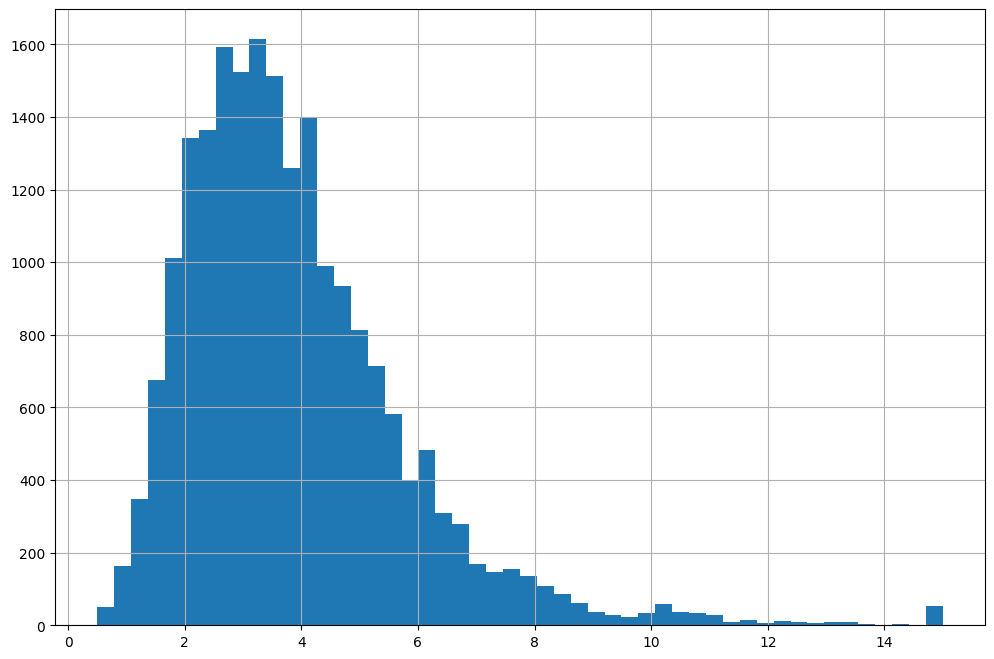

In [171]:
housing['median_income'].hist(bins=50, figsize=(12, 8))

In [172]:
strat_train_set, strat_test_set = strat_splits[0]


In [173]:
100*strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
C    35.053295
B    31.879845
D    17.635659
E    11.434109
A     3.997093
Name: count, dtype: float64

In [174]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

C:\Users\Zam\AppData\Local\Temp\ipykernel_13644\1299016719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)
C:\Users\Zam\AppData\Local\Temp\ipykernel_13644\1299016719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)


In [175]:
print(strat_test_set)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3905     -121.95     37.11                21.0       2387.0           357.0   
16821    -118.01     33.89                36.0       1589.0           265.0   
2900     -118.18     33.74                30.0       5915.0          1750.0   
7193     -122.48     37.74                52.0       2166.0           423.0   
13928    -122.39     37.78                 5.0       1405.0           515.0   
...          ...       ...                 ...          ...             ...   
12369    -124.16     40.79                46.0       3042.0           597.0   
8707     -119.01     35.39                29.0       1820.0           459.0   
16634    -123.01     38.67                33.0        914.0           147.0   
9779     -122.03     37.60                24.0       2077.0           383.0   
3455     -117.12     32.74                52.0       1969.0           389.0   

       population  households  median_income  media

In [176]:
column_target = ["median_income" , "median_house_value", "ocean_proximity", "longitude", "income_cat"]
columns_drop = [column for column in housing.columns if column not in column_target]
for column in columns_drop:
    for set_ in (strat_train_set, strat_test_set):
        set_.drop(column, axis=1, inplace=True)

C:\Users\Zam\AppData\Local\Temp\ipykernel_13644\2277145542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop(column, axis=1, inplace=True)
C:\Users\Zam\AppData\Local\Temp\ipykernel_13644\2277145542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop(column, axis=1, inplace=True)
C:\Users\Zam\AppData\Local\Temp\ipykernel_13644\2277145542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop(column, axis=1, 

In [177]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("longitude", axis=1, inplace=True)

C:\Users\Zam\AppData\Local\Temp\ipykernel_13644\3976509510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("longitude", axis=1, inplace=True)
C:\Users\Zam\AppData\Local\Temp\ipykernel_13644\3976509510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("longitude", axis=1, inplace=True)


In [178]:
print(strat_test_set)

       median_income  median_house_value ocean_proximity
3905          7.7360            397700.0       <1H OCEAN
16821         4.6354            202900.0       <1H OCEAN
2900          4.0968            310000.0      NEAR OCEAN
7193          4.1310            314300.0      NEAR OCEAN
13928         3.6037            187500.0        NEAR BAY
...              ...                 ...             ...
12369         2.1135             90600.0      NEAR OCEAN
8707          1.8289             59400.0          INLAND
16634         4.6875            246200.0       <1H OCEAN
9779          4.5721            214700.0        NEAR BAY
3455          3.7900            163400.0      NEAR OCEAN

[4128 rows x 3 columns]


In [179]:
from sklearn.linear_model import LinearRegression

In [180]:
print(housing_cat_encoded)

[[3.]
 [0.]
 [1.]
 ...
 [4.]
 [0.]
 [4.]]


In [181]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [182]:
from sklearn.preprocessing import OrdinalEncoder
housing_cat = housing[["ocean_proximity"]]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [183]:
housing['ocean_proximity'] = housing_cat_encoded

In [184]:
print(housing)

       median_income  ocean_proximity
13096         2.0987              3.0
14973         6.0876              0.0
3785          2.4330              1.0
14689         2.2618              1.0
20507         3.5292              4.0
...              ...              ...
14207         4.7105              0.0
13105         2.5733              1.0
19301         4.0616              4.0
19121         4.1455              0.0
19888         3.2833              4.0

[16512 rows x 2 columns]
